In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

In [2]:
data_dir = '/Users/marjimbel/PycharmProjects/pytorch_practice/notebooks/Cat_Dog_data'

# TODO: Define transforms for the training data and testing data

image_size = 28

train_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size-1),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size-1),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])



# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


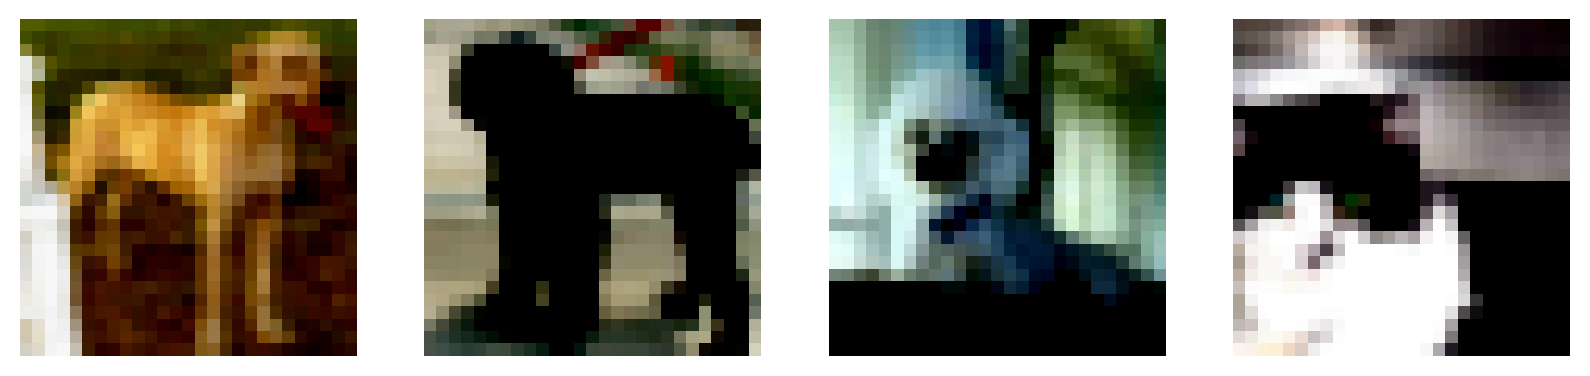

In [3]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [7]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset

import torch.nn as nn

features_dim = images.view(images.shape[0],-1).shape[1]
fc_layers = [512, 256, 128]
output_layer_dim = 2

class CatDogClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(features_dim, fc_layers[0])
        self.fc2 = nn.Linear(fc_layers[0],fc_layers[1])
        self.fc3 = nn.Linear(fc_layers[1],fc_layers[2])
        self.fc4 = nn.Linear(fc_layers[2], output_layer_dim)

        self.dropout = nn.Dropout(p=0.1)
        self.relu = nn.ReLU()
        self.log_Sigmoid = nn.LogSigmoid()

    def forward(self, x):
        # reshape the input images
        x = x.view(x.shape[0],-1)

        # dense layer pass
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))

        # output
        x = self.log_Sigmoid(self.fc4(x))
        return x


model = CatDogClassifier()

In [8]:
import torch.optim as optim
import fc_model

optimizer = optim.Adam(model.parameters(), lr=.003)
criterion = nn.NLLLoss()
epochs = 10
model = CatDogClassifier()


steps =0
running_loss = 0
for e in range(0, epochs):
    model.train()
    for images, labels in trainloader:

        steps += 1

        # clear gradients
        optimizer.zero_grad()
        log_soft  = model.forward(images)
        loss = criterion(log_soft, labels)
        loss.backward()
        running_loss += loss.item()

        # take SGD step
        optimizer.step()

        if steps % 10 == 0:
            # Model in inference mode, dropout is off
            model.eval()

            # Turn off gradients for validation, will speed up inference
            with torch.no_grad():
                test_loss, accuracy = fc_model.validation(model, testloader, criterion, features_dim)

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/10),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

            running_loss = 0

            # Make sure dropout and grads are on for training
            model.train()


Epoch: 1/10..  Training Loss: 0.673..  Test Loss: 0.675..  Test Accuracy: 0.497
Epoch: 1/10..  Training Loss: 0.671..  Test Loss: 0.675..  Test Accuracy: 0.503
Epoch: 1/10..  Training Loss: 0.671..  Test Loss: 0.675..  Test Accuracy: 0.500
Epoch: 1/10..  Training Loss: 0.670..  Test Loss: 0.675..  Test Accuracy: 0.500
Epoch: 1/10..  Training Loss: 0.674..  Test Loss: 0.675..  Test Accuracy: 0.497
Epoch: 1/10..  Training Loss: 0.675..  Test Loss: 0.675..  Test Accuracy: 0.497
Epoch: 1/10..  Training Loss: 0.676..  Test Loss: 0.675..  Test Accuracy: 0.497
Epoch: 1/10..  Training Loss: 0.669..  Test Loss: 0.675..  Test Accuracy: 0.500
Epoch: 1/10..  Training Loss: 0.671..  Test Loss: 0.675..  Test Accuracy: 0.503
Epoch: 1/10..  Training Loss: 0.674..  Test Loss: 0.675..  Test Accuracy: 0.494
Epoch: 1/10..  Training Loss: 0.673..  Test Loss: 0.675..  Test Accuracy: 0.500
Epoch: 1/10..  Training Loss: 0.671..  Test Loss: 0.675..  Test Accuracy: 0.494
Epoch: 1/10..  Training Loss: 0.671..  T

KeyboardInterrupt: 

In [7]:
# Create the network, define the criterion and optimizer
import fc_model
import torch.optim as optim
import torch.nn as nn

images, labels = next(iter(trainloader))
features_size = images.view(images.shape[0],-1).shape[1]
print(f"features_size = {features_size}")

network_model = fc_model.Network(features_size, 2, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(network_model.parameters(), lr=0.001)

fc_model.train(
    network_model,
    trainloader,
    testloader,
    criterion,
    optimizer=optimizer,
    features_dim=features_size,
    epochs=2)



features_size = 2187
Epoch: 1/2..  Training Loss: 0.704..  Test Loss: 0.679..  Test Accuracy: 0.563
Epoch: 1/2..  Training Loss: 0.703..  Test Loss: 0.681..  Test Accuracy: 0.561
Epoch: 1/2..  Training Loss: 0.705..  Test Loss: 0.687..  Test Accuracy: 0.570
Epoch: 1/2..  Training Loss: 0.683..  Test Loss: 0.682..  Test Accuracy: 0.567
Epoch: 1/2..  Training Loss: 0.689..  Test Loss: 0.691..  Test Accuracy: 0.570
Epoch: 1/2..  Training Loss: 0.687..  Test Loss: 0.678..  Test Accuracy: 0.565
Epoch: 1/2..  Training Loss: 0.681..  Test Loss: 0.675..  Test Accuracy: 0.584
Epoch: 1/2..  Training Loss: 0.688..  Test Loss: 0.673..  Test Accuracy: 0.588
Epoch: 1/2..  Training Loss: 0.668..  Test Loss: 0.680..  Test Accuracy: 0.555
Epoch: 1/2..  Training Loss: 0.694..  Test Loss: 0.684..  Test Accuracy: 0.579
Epoch: 1/2..  Training Loss: 0.680..  Test Loss: 0.682..  Test Accuracy: 0.582
Epoch: 1/2..  Training Loss: 0.685..  Test Loss: 0.674..  Test Accuracy: 0.591
Epoch: 1/2..  Training Loss: 0.